In [1]:
import nltk
import os

'''
    
    this file is for processing the data use gensim to preprocess 
    glove for embedding word vector

'''

# the data path for train and test
train_files = ['aclImdb/train/pos/', 'aclImdb/train/neg/']
test_files = ['aclImdb/test/pos/', 'aclImdb/test/neg/']

In [23]:
def readFile(path_list):
    reviews = []
    labels = []

    for path in path_list:
        files = os.listdir(path=path)
        for file in files:
            label = file.split('.')[0].split('_')[1]
            review = ''
            f = open(file=path+file, mode='r', encoding='utf-8')
            for line in f.readlines():
                review += line
            reviews.append(review)
            labels.append(label)
    return reviews, labels

In [24]:
input_review_train, label_train = readFile(train_files)
input_review_test, label_test = readFile(test_files)

In [19]:
pos_neg_label = [0]*12500 + [1]*12500
y_label = pos_neg_label + pos_neg_label
print(len(y_label))
x_reviews = input_review_train + input_review_test
print(len(x_reviews))

50000
50000


In [16]:
import numpy as np
np.save('x_reviews.npy', x_reviews)
np.save('y_label.npy', y_label)

In [89]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
import keras

In [31]:
x_reviews = list(input_review_train + input_review_test)
tok = Tokenizer()
tok.fit_on_texts(x_reviews)
seq = tok.texts_to_sequences(x_reviews)

In [36]:
# check the length of each docment for padding
length = [len(se) for se in seq]
counts = np.bincount(length)
print(np.argmax(counts))

124


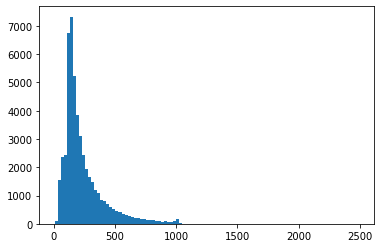

In [38]:
import matplotlib.pyplot as plt
plt.hist(sorted(length), bins=100)
plt.show()

In [60]:
x_train = sequence.pad_sequences(sequences=seq, maxlen=500)
word_dictionary = tok.word_index

In [43]:
glove_50_vectors = {}
with open('glove.6B.50d.txt', encoding='utf-8', mode='r') as f:
    for line in f.readlines():
        row = line.split()
        glove_50_vectors[row[0]] = np.asarray(row[1:],dtype='float32')

print('numbers of vector: ', len(glove_50_vectors))

numbers of vector:  400000


In [49]:
# since the dictionary index is start from 1, so the wights matrix should have one more dimension
weight_matrix = np.zeros((len(word_dictionary)+1, 50))
for word, index in word_dictionary.items():
  if word in glove_50_vectors.keys():
    weight_matrix[index] = glove_50_vectors[word]

In [57]:
print(weight_matrix.shape)
print(len(word_dictionary))
print(word_dictionary['king'])
print(len(glove_50_vectors['king']))
print(len(weight_matrix[775]))

(124253, 50)
124252
775
50
50


In [61]:
np.save('x_train.npy',x_train)
np.save('weight_matrix.npy',weight_matrix)

In [68]:
##############################################
#
#      try to reduce the number of features
#  
##############################################

In [86]:
word = Tokenizer(num_words=10000)
word.fit_on_texts(x_reviews)
x_sequence = word.texts_to_sequences(x_reviews)

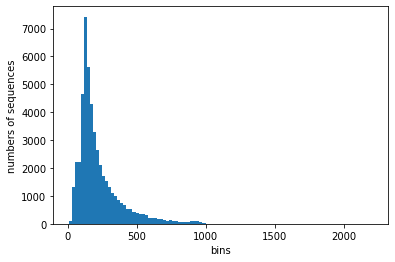

In [103]:
new_length = [len(se) for se in x_sequence]
import matplotlib.pyplot as plt
plt.hist(sorted(new_length), bins=100)
plt.xlabel("bins")
plt.ylabel("numbers of sequences")
plt.show()

In [90]:
x_train_1000 = sequence.pad_sequences(x_sequence, maxlen=500)
word_dic_1000 = word.word_index

In [95]:
new_weight_matrix = np.zeros((len(word_dic_1000)+1, 50))
for words, indexs in word_dic_1000.items():
  if words in glove_50_vectors.keys():
    new_weight_matrix[indexs] = glove_50_vectors[words]

In [97]:
np.save('x_train_1000.npy',x_train_1000)
np.save('new_weight_matrix.npy',new_weight_matrix)

In [100]:
print(word_dictionary)

{'the': 1, 'and': 2, 'a': 3, 'of': 4, 'to': 5, 'is': 6, 'br': 7, 'in': 8, 'it': 9, 'i': 10, 'this': 11, 'that': 12, 'was': 13, 'as': 14, 'for': 15, 'with': 16, 'movie': 17, 'but': 18, 'film': 19, 'on': 20, 'not': 21, 'you': 22, 'are': 23, 'his': 24, 'have': 25, 'be': 26, 'one': 27, 'he': 28, 'all': 29, 'at': 30, 'by': 31, 'an': 32, 'they': 33, 'so': 34, 'who': 35, 'from': 36, 'like': 37, 'or': 38, 'just': 39, 'her': 40, 'out': 41, 'about': 42, 'if': 43, "it's": 44, 'has': 45, 'there': 46, 'some': 47, 'what': 48, 'good': 49, 'when': 50, 'more': 51, 'very': 52, 'up': 53, 'no': 54, 'time': 55, 'my': 56, 'even': 57, 'would': 58, 'she': 59, 'which': 60, 'only': 61, 'really': 62, 'see': 63, 'story': 64, 'their': 65, 'had': 66, 'can': 67, 'me': 68, 'well': 69, 'were': 70, 'than': 71, 'much': 72, 'we': 73, 'bad': 74, 'been': 75, 'get': 76, 'do': 77, 'great': 78, 'other': 79, 'will': 80, 'also': 81, 'into': 82, 'people': 83, 'because': 84, 'how': 85, 'first': 86, 'him': 87, 'most': 88, "don't":

In [101]:
len(word_dictionary)

124252

In [102]:
weight_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.41800001,  0.24968   , -0.41242   , ..., -0.18411   ,
        -0.11514   , -0.78580999],
       [ 0.26818001,  0.14346001, -0.27877   , ..., -0.63209999,
        -0.25027999, -0.38097   ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.047113  ,  0.59322   ,  0.1965    , ..., -0.81061   ,
        -0.49171001,  0.4628    ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])